In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pandas.read_csv('Dataset/training_data.csv', sep='\t')

df.head()

,essay id,misspelled words,words,words per sentence,lexical diversity,raw score,normalized score
0,5979,15,130,10.833333,0.600000,2,1
1,5980,4,62,7.750000,0.774194,1,0
2,5981,7,42,14.000000,0.952381,1,0
3,5982,11,70,23.333333,0.685714,2,1
4,5983,4,43,14.333333,0.790698,1,0


In [3]:
df.shape

(3495, 7)

In [4]:
#transform the skewed distributions (misspelled words, words, and words per sentence) into uniform distributions
uniform = np.log(df[['misspelled words', 'words', 'words per sentence']])

In [5]:
#add lexical diversity to the dataframe
uniform.insert(3, 'lexical diversity', df['lexical diversity'], False)

In [6]:
#replace non-numerical values in misspelled words with 0
uniform['misspelled words'] = uniform['misspelled words'].replace([np.inf, -np.inf], 0)

In [7]:
X = uniform[['misspelled words', 'words', 'words per sentence', 'lexical diversity']].values
y = df['normalized score'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(20,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

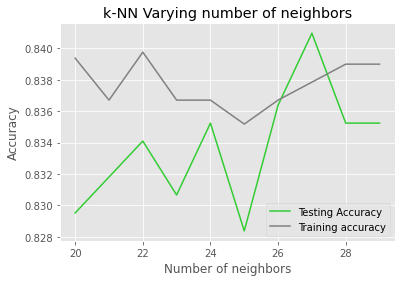

In [10]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', color='Limegreen')
plt.plot(neighbors, train_accuracy, label='Training accuracy', color='Gray')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [11]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=26)

In [12]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=26)

In [13]:
#Get accuracy
accuracy_score = knn.score(X_test,y_test)
inaccurate = 1 - accuracy_score

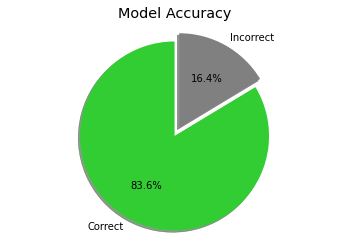

In [14]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Correct', 'Incorrect'
sizes = [accuracy_score, inaccurate]

colors = ('Limegreen', 'Gray')
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Correct')


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Model Accuracy')

plt.show()

In [15]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [16]:
pandas.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,331,67,398
1,76,400,476
All,407,467,874


In [31]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
#nltk.download()
from spellchecker import SpellChecker
import ipywidgets as widgets
from IPython.display import display

In [40]:
output = widgets.Output(layout={'border': '1px solid black'})

In [41]:
author = widgets.Text(
    placeholder='author name',
    description='Author Name:',
    disabled=False
)

essay = widgets.Textarea(
    placeholder='type OR copy/paste essay',
    description='Essay:',
    disabled=False
)

In [43]:
@output.capture(clear_output=False,wait=True)
def on_submit_button(b):
    if (len(author.value)==0) or (len(essay.value)==0):
        print("Error: 'Author Name' AND/OR 'Essay' text is blank. Complete both fields to continue.")
        
    else:
        grade(essay.value)
output

Output(layout=Layout(border='1px solid black'))

In [21]:
submit_button = widgets.Button(
    description='Submit',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check-circle' # (FontAwesome names without the `fa-` prefix)
)

submit_button.on_click(on_submit_button)

In [44]:
@output.capture(clear_output=False,wait=True)
def on_report_button(b):
    print("Here's the report!")
output

Output(layout=Layout(border='1px solid black'))

In [45]:
report_button = widgets.Button(
    description='Generate Report',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='file-export' # (FontAwesome names without the `fa-` prefix)
)

report_button.on_click(on_report_button)

In [47]:
@output.capture(clear_output=False,wait=True)
def authenticate(username, password):
    if (len(username)==0) or (len(password)==0):
        print("Error: 'Username' AND/OR 'Password' is blank. Complete both fields to continue.")
        
    else:
        print("Welcome!")
        display(author)
        display(essay)
        display(submit_button)
output

Output(layout=Layout(border='1px solid black'))

In [51]:
username = widgets.Text(
    placeholder='username',
    description='Username:',
    disabled=False
)

password = widgets.Password(
    placeholder='password',
    description='Password:',
    disabled=False
)

display(username)
display(password)

Text(value='', description='Username:', placeholder='username')

Password(description='Password:', placeholder='password')

In [52]:
def on_login_button(b):
    authenticate(username.value, password.value)

In [53]:
login_button = widgets.Button(
    description='Login',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='sign-in-alt' # (FontAwesome names without the `fa-` prefix)
)

login_button.on_click(on_login_button)
display(login_button)

Button(description='Login', icon='sign-in-alt', style=ButtonStyle(), tooltip='Click me')

In [54]:
def insert_score():
    print("Score saved to database!")
    #
    #
    #
    #
    #

In [57]:
@output.capture(clear_output=False,wait=True)
def grade(text):
    
    sentences = sent_tokenize(text)
    words = word_tokenize(text)

    spell = SpellChecker()
    misspelled = spell.unknown(words)

    ###FEATURE 1: MISSPELLED WORDS###
    num_misspelled = len(misspelled)

    stops = set(stopwords.words('english'))

    filtered_words = []

    for w in words:
        if w in misspelled:
            continue

        if w not in stops:
            filtered_words.append(w)

    ###FEATURE 2: TOTAL WORDS###
    total_words = len(filtered_words)

    ###FEATURE 3: WORDS PER SENTENCE###
    words_per_sentence = total_words / len(sentences)

    unique_words = len(set(filtered_words))

    ###FEATURE 4: LEXICAL DIVERSITY###
    lexical_diversity = unique_words / total_words

    features = [[num_misspelled, total_words, words_per_sentence, lexical_diversity]]

    #Predicted Score
    predicted_score = knn.predict(features)[0]
    score_codes = ['FAIL', 'PASS']
    
    #Insert Score into Database
    #insert_score()

    print('Grade: ' + score_codes[predicted_score])

    ###Wordcount###
    rslt_df = df[df['normalized score'] == predicted_score]

    mean_words = rslt_df['words'].mean()

    x_labels = ['This Essay', 'Average Essay of a Similar Score']
    word_vals = [total_words, mean_words]

    x_pos = [i for i, _ in enumerate(x_labels)]

    plt.bar(x_pos, word_vals, color=['Limegreen', 'Gray'])

    plt.ylabel("Number of Words")
    plt.title("Wordcount")
    plt.xticks(x_pos, x_labels)

    plt.show()

    ###Misspellings###
    rslt_df = df[df['normalized score'] == predicted_score]

    mean_errors = rslt_df['misspelled words'].mean()

    x_labels = ['This Essay', 'Average Essay of a Similar Score']
    word_vals = [num_misspelled, mean_errors]

    x_pos = [i for i, _ in enumerate(x_labels)]

    plt.bar(x_pos, word_vals, color=['Limegreen', 'Gray'])

    plt.ylabel("Number of Misspellings")
    plt.title("Misspellings")
    plt.xticks(x_pos, x_labels)
    
    plt.show()

    ###Lexical Diversity###
    rslt_df = df[df['normalized score'] == predicted_score]

    mean_diversity = rslt_df['lexical diversity'].mean()

    x_labels = ['This Essay', 'Average Essay of a Similar Score']
    word_vals = [lexical_diversity, mean_diversity]

    x_pos = [i for i, _ in enumerate(x_labels)]

    plt.bar(x_pos, word_vals, color=['Limegreen', 'Gray'])

    plt.ylabel("Ratio of Unique Words")
    plt.title("Lexical Diversity")
    plt.xticks(x_pos, x_labels)

    plt.show()
    
    #Generate report
    display(report_button)
output

Output(layout=Layout(border='1px solid black'))